✅ Dataset Loaded Successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  68                      86
1           2  Female   56                  22                      57
2           3    Male   66                  41                      29
3           4    Male   69                  41                      78
4           5    Male   49                 112                      92


C:\Users\New User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\New User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

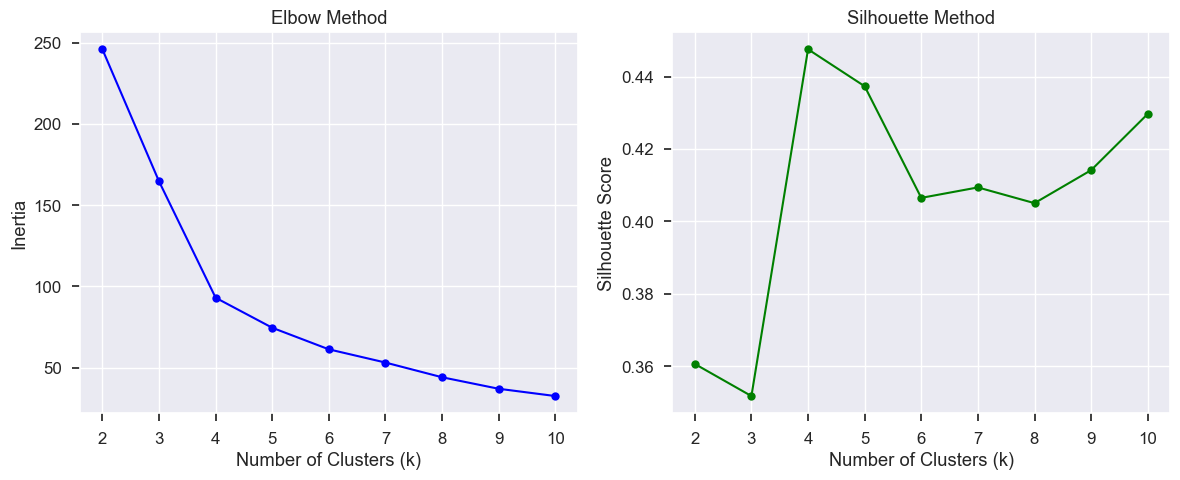

📊 Optimal number of clusters (k): 4

Cluster Centers (Scaled):
[[-0.71350691  0.92044664]
 [ 1.0515019  -0.76715941]
 [ 1.19952051  1.05182197]
 [-0.66606283 -0.82965776]]


C:\Users\New User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


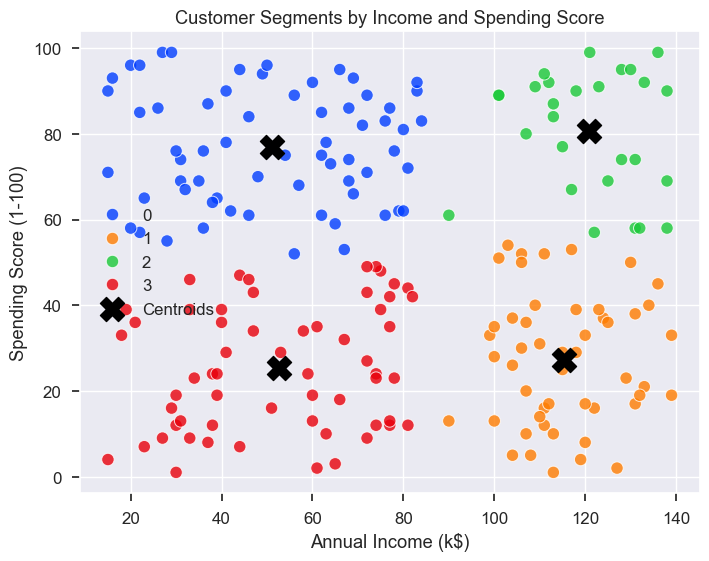


🧩 Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     51.02                   76.84
1                    115.38                   27.26
2                    120.78                   80.70
3                     52.75                   25.42


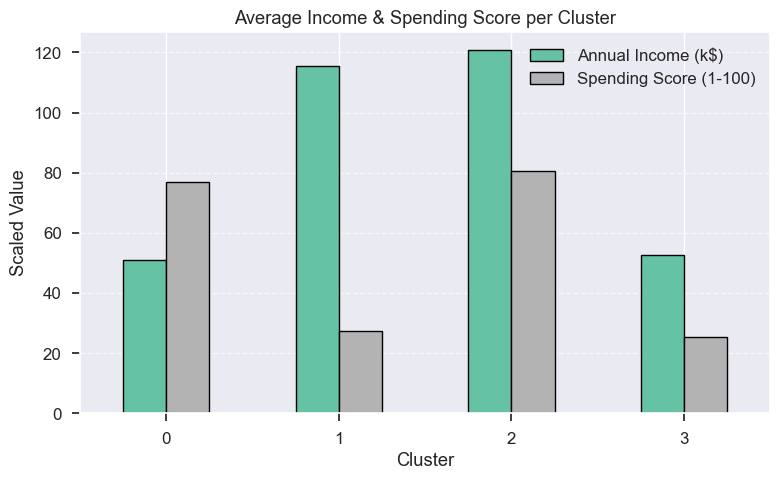


💾 Clustered data saved as 'Customer_Segmentation_Results.csv'


In [1]:
# ==============================
# CUSTOMER SEGMENTATION (Mall Dataset)
# ==============================

# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For clean plots
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.1)

# ==============================
# 1️⃣ Load Dataset
# ==============================

# Download the dataset from Kaggle: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial
# Place it in your working directory as 'Mall_Customers.csv'

try:
    data = pd.read_csv("Mall_Customers.csv")
except FileNotFoundError:
    # Fallback synthetic dataset if CSV not found
    np.random.seed(42)
    data = pd.DataFrame({
        "CustomerID": np.arange(1, 201),
        "Gender": np.random.choice(["Male", "Female"], 200),
        "Age": np.random.randint(18, 70, 200),
        "Annual Income (k$)": np.random.randint(15, 140, 200),
        "Spending Score (1-100)": np.random.randint(1, 100, 200)
    })

print("✅ Dataset Loaded Successfully!")
print(data.head())

# ==============================
# 2️⃣ Data Preprocessing
# ==============================

X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 3️⃣ Determine Optimal Number of Clusters
# ==============================

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'o-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_k = K[np.argmax(silhouette_scores)]
print(f"📊 Optimal number of clusters (k): {optimal_k}")

# ==============================
# 4️⃣ Apply K-Means Clustering
# ==============================

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["Cluster"] = clusters

print("\nCluster Centers (Scaled):")
print(kmeans.cluster_centers_)

# ==============================
# 5️⃣ Visualize Clusters (2D)
# ==============================

plt.figure(figsize=(8, 6))
palette = sns.color_palette("bright", optimal_k)
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette=palette,
    data=data,
    s=80,
    alpha=0.8
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)
plt.title("Customer Segments by Income and Spending Score")
plt.legend()
plt.show()

# ==============================
# 6️⃣ Analyze Cluster Characteristics
# ==============================

cluster_summary = data.groupby("Cluster")[
    ["Annual Income (k$)", "Spending Score (1-100)"]
].mean().round(2)
print("\n🧩 Cluster Summary:")
print(cluster_summary)

# Visualize cluster characteristics
cluster_summary.plot(kind='bar', figsize=(8, 5), colormap='Set2', edgecolor='black')
plt.title("Average Income & Spending Score per Cluster")
plt.ylabel("Scaled Value")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ==============================
# 7️⃣ (Optional) Save Clustered Data
# ==============================
data.to_csv("Customer_Segmentation_Results.csv", index=False)
print("\n💾 Clustered data saved as 'Customer_Segmentation_Results.csv'")
